In [109]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import imageio
from pathlib import Path
import cmocean
import warnings


In [156]:
file_path = '/Volumes/KESU/IRCAM_data/apr122021/'
name = "tattoo.h5"

In [157]:
def create_stokes_images(filepath, name, save_path):
    warnings.filterwarnings('ignore')
    #load flux images from HDF5
    hf = h5py.File(file_path+name, 'r')
    I0   = np.array(hf['I0'])
    I135 = np.array(hf['I135'])
    I45  = np.array(hf['I45'])
    I90  = np.array(hf['I90'])
    
    #calculate stokes parameters
    S0 = (I0+I45+I90+I135)/2
    S1 = (I0-I90)
    S2 = (I45-I135)
    S0a = (I0+I45)
    S0b = (I90+I135)
    
    #Temporal Shift
    plt.imshow(np.abs(S0a-S0b)/S0, cmap='Greys_r', interpolation='none')
    plt.colorbar(extend='both')
    plt.title("$|S_{0,a} - S_{0,b}|/ S_0$",fontsize = 20)
    plt.axis('off')
    plt.show()
    
    #AOLP DOLP
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
    # plot just the positive data and save the
    # color "mappable" object returned by ax1.imshow
    pos1 = ax1.imshow(S0, cmap='Greys_r', interpolation='none')
    fig.colorbar(pos1, ax=ax1,extend='both',label = "ADU")
    ax1.set_title("$S_0$",fontsize = 20)

    pos2 = ax2.imshow(np.sqrt(S1**2+S2**2)/S0, cmap='Greys_r', interpolation='none',vmin=0, vmax=.03)
    fig.colorbar(pos2, ax=ax2,extend='both',label = '[%]')
    ax2.set_title("DOLP",fontsize = 20)

    pos3 = ax3.imshow(180/ np.arctan2(S2,S1), cmap='hsv', interpolation='none',vmin=-180, vmax=180)
    fig.colorbar(pos3, ax=ax3,extend='both',label = "[$^\circ$]")
    ax3.set_title("AOLP",fontsize = 20)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    plt.show()
    
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

    # STOKES IMAGES
    # color "mappable" object returned by ax1.imshow
    pos1 = ax1.imshow(S0, cmap='Greys_r', interpolation='none')
    fig.colorbar(pos1, ax=ax1,extend='both')
    ax1.set_title("$S_0$",fontsize = 20)

    pos2 = ax2.imshow(S1/S0, cmap='bwr', interpolation='none')
    fig.colorbar(pos2, ax=ax2,extend='both')
    ax2.set_title("$s_1$",fontsize = 20)

    pos3 = ax3.imshow(S2/S0, cmap='bwr', interpolation='none')
    fig.colorbar(pos3, ax=ax3,extend='both')
    ax3.set_title("$s_2$",fontsize = 20)

    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

    plt.show()

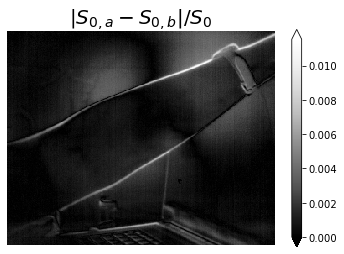

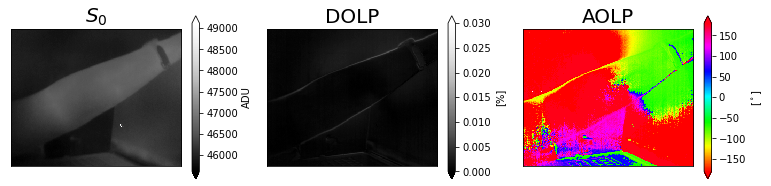

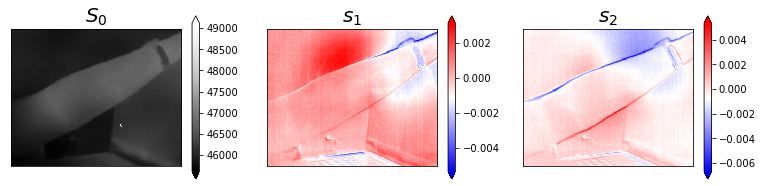

In [159]:
file_path = '/Volumes/KESU/IRCAM_data/apr122021/'
save_path = '/Volumes/KESU/IRCAM_data/apr122021/imgs/'
name = "tattoo2.h5"

create_stokes_images(file_path, name, save_path)